## Join the DataFrames like SQL tables in Python using Pandas

In [1]:
import pandas as pd

In [2]:
df1 = pd.DataFrame([
       (1, 345, 'B', True),
       (2, 100, 'C', False),
       (3, 300, 'B', False),
       (4, 151, 'A', False),
       (5, 212, 'A', True),
       (6, 121, 'C', False),
       (7, 333, 'B', True),
       (8, 456, 'C', True),
    ],
    columns=['id', 'value', 'colC', 'colD'])
df2 = pd.DataFrame([
       (1, 111, 10.1, 3),
       (9, 56, 3.33, 10),
       (10, 17, 18.0, 8),
       (3, 567, 19.1, 4),
       (11, 98, 2.1, 1),
       (6, 31, 3.14, 12),
    ],
    columns=['id', 'value', 'colE', 'colF'])


In [3]:
print(df1)

   id  value colC   colD
0   1    345    B   True
1   2    100    C  False
2   3    300    B  False
3   4    151    A  False
4   5    212    A   True
5   6    121    C  False
6   7    333    B   True
7   8    456    C   True


In [4]:
print(df2)

   id  value   colE  colF
0   1    111  10.10     3
1   9     56   3.33    10
2  10     17  18.00     8
3   3    567  19.10     4
4  11     98   2.10     1
5   6     31   3.14    12


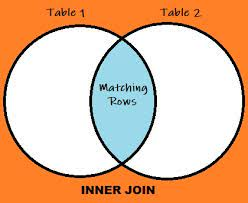

In [5]:
df1.merge(df2, on = 'id')

,id,value_x,colC,colD,value_y,colE,colF
0,1,345,B,True,111,10.10,3
1,3,300,B,False,567,19.10,4
2,6,121,C,False,31,3.14,12


### Left Join
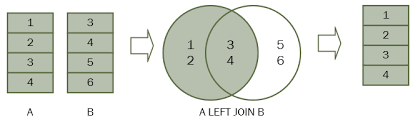

In [6]:
df1.merge(df2,how = 'left', on = 'id')

,id,value_x,colC,colD,value_y,colE,colF
0,1,345,B,True,111.0,10.10,3.0
1,2,100,C,False,NaN,NaN,NaN
2,3,300,B,False,567.0,19.10,4.0
3,4,151,A,False,NaN,NaN,NaN
4,5,212,A,True,NaN,NaN,NaN
5,6,121,C,False,31.0,3.14,12.0
6,7,333,B,True,NaN,NaN,NaN
7,8,456,C,True,NaN,NaN,NaN


In [7]:
df1.merge(df2,how = 'left', on = 'id', indicator=True)

,id,value_x,colC,colD,value_y,colE,colF,_merge
0,1,345,B,True,111.0,10.10,3.0,both
1,2,100,C,False,NaN,NaN,NaN,left_only
2,3,300,B,False,567.0,19.10,4.0,both
3,4,151,A,False,NaN,NaN,NaN,left_only
4,5,212,A,True,NaN,NaN,NaN,left_only
5,6,121,C,False,31.0,3.14,12.0,both
6,7,333,B,True,NaN,NaN,NaN,left_only
7,8,456,C,True,NaN,NaN,NaN,left_only


### Left Anti-Join
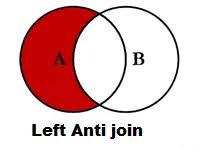

In [8]:
df1.merge(df2,how = 'left', on = 'id',indicator=True ).query("_merge == 'left_only'")

,id,value_x,colC,colD,value_y,colE,colF,_merge
1,2,100,C,False,NaN,NaN,NaN,left_only
3,4,151,A,False,NaN,NaN,NaN,left_only
4,5,212,A,True,NaN,NaN,NaN,left_only
6,7,333,B,True,NaN,NaN,NaN,left_only
7,8,456,C,True,NaN,NaN,NaN,left_only


### Right Join
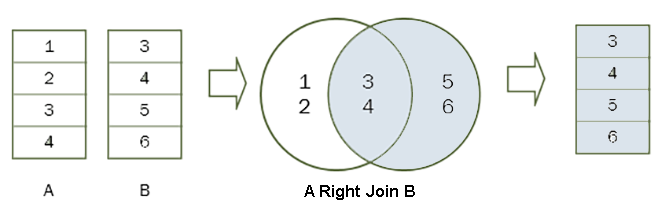

In [9]:
df1.merge(df2, how = 'right', on = 'id')

,id,value_x,colC,colD,value_y,colE,colF
0,1,345.0,B,True,111,10.10,3
1,9,NaN,NaN,NaN,56,3.33,10
2,10,NaN,NaN,NaN,17,18.00,8
3,3,300.0,B,False,567,19.10,4
4,11,NaN,NaN,NaN,98,2.10,1
5,6,121.0,C,False,31,3.14,12


In [10]:
df1.merge(df2, how = 'right', on ='id',indicator=True)

,id,value_x,colC,colD,value_y,colE,colF,_merge
0,1,345.0,B,True,111,10.10,3,both
1,9,NaN,NaN,NaN,56,3.33,10,right_only
2,10,NaN,NaN,NaN,17,18.00,8,right_only
3,3,300.0,B,False,567,19.10,4,both
4,11,NaN,NaN,NaN,98,2.10,1,right_only
5,6,121.0,C,False,31,3.14,12,both


### Right Anti-Join
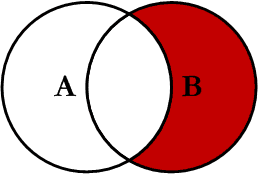


In [11]:
df1.merge(df2,how = 'right',on = 'id',indicator=True).query('_merge == "right_only"')

,id,value_x,colC,colD,value_y,colE,colF,_merge
1,9,NaN,NaN,NaN,56,3.33,10,right_only
2,10,NaN,NaN,NaN,17,18.00,8,right_only
4,11,NaN,NaN,NaN,98,2.10,1,right_only


In [12]:
df2.merge(df1, how = 'right',on = 'id')

,id,value_x,colE,colF,value_y,colC,colD
0,1,111.0,10.10,3.0,345,B,True
1,2,NaN,NaN,NaN,100,C,False
2,3,567.0,19.10,4.0,300,B,False
3,4,NaN,NaN,NaN,151,A,False
4,5,NaN,NaN,NaN,212,A,True
5,6,31.0,3.14,12.0,121,C,False
6,7,NaN,NaN,NaN,333,B,True
7,8,NaN,NaN,NaN,456,C,True


### Full Join 
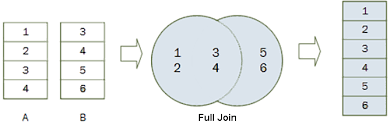

In [13]:
df1.merge(df2,how = 'outer', on = 'id') 

,id,value_x,colC,colD,value_y,colE,colF
0,1,345.0,B,True,111.0,10.10,3.0
1,2,100.0,C,False,NaN,NaN,NaN
2,3,300.0,B,False,567.0,19.10,4.0
3,4,151.0,A,False,NaN,NaN,NaN
4,5,212.0,A,True,NaN,NaN,NaN
5,6,121.0,C,False,31.0,3.14,12.0
6,7,333.0,B,True,NaN,NaN,NaN
7,8,456.0,C,True,NaN,NaN,NaN
8,9,NaN,NaN,NaN,56.0,3.33,10.0
9,10,NaN,NaN,NaN,17.0,18.00,8.0


In [14]:
df1.merge(df2 ,how = 'outer', on = 'id', indicator=True)

,id,value_x,colC,colD,value_y,colE,colF,_merge
0,1,345.0,B,True,111.0,10.10,3.0,both
1,2,100.0,C,False,NaN,NaN,NaN,left_only
2,3,300.0,B,False,567.0,19.10,4.0,both
3,4,151.0,A,False,NaN,NaN,NaN,left_only
4,5,212.0,A,True,NaN,NaN,NaN,left_only
5,6,121.0,C,False,31.0,3.14,12.0,both
6,7,333.0,B,True,NaN,NaN,NaN,left_only
7,8,456.0,C,True,NaN,NaN,NaN,left_only
8,9,NaN,NaN,NaN,56.0,3.33,10.0,right_only
9,10,NaN,NaN,NaN,17.0,18.00,8.0,right_only


### Full Anti-Join
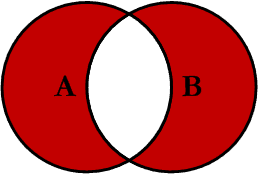


In [15]:
df1.merge(df2 ,how = 'outer', on = 'id', indicator=True).query("_merge !='both'")

,id,value_x,colC,colD,value_y,colE,colF,_merge
1,2,100.0,C,False,NaN,NaN,NaN,left_only
3,4,151.0,A,False,NaN,NaN,NaN,left_only
4,5,212.0,A,True,NaN,NaN,NaN,left_only
6,7,333.0,B,True,NaN,NaN,NaN,left_only
7,8,456.0,C,True,NaN,NaN,NaN,left_only
8,9,NaN,NaN,NaN,56.0,3.33,10.0,right_only
9,10,NaN,NaN,NaN,17.0,18.00,8.0,right_only
10,11,NaN,NaN,NaN,98.0,2.10,1.0,right_only


## SQL
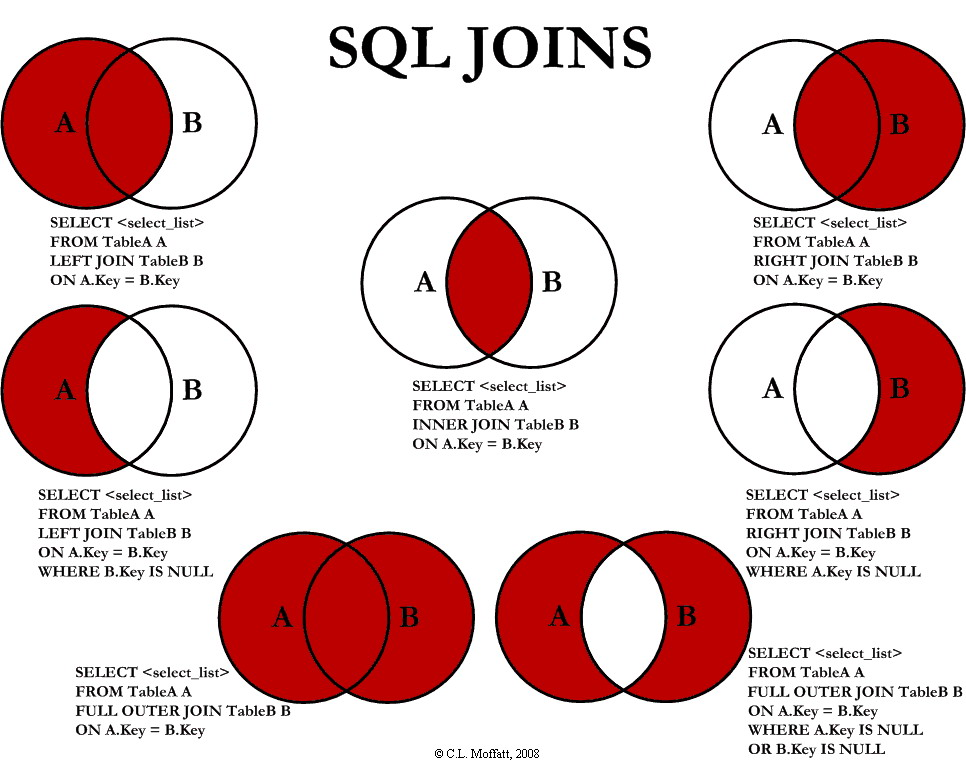

### Pandas DataFrame to SQL

we want to see how to get from Pandas DataFrame to SQL.

#### Create a DataFrame

In [16]:
# Country and its capitals
capitals = pd.DataFrame(
    {'Country':['Afghanistan','Argentina','Australia','Canada','China','France','India','Nepal','Russia','Spain'],
     'ISO' : ['AF','AR','AU','CA','CN','FR','IN','NP','RU','ES'],
     'Capital' : ['Kabul','Buenos_Aires','Canberra','Ottawa','Beijing','Paris','New_Delhi','Katmandu','Moscow','Madrid'] },
    columns=['Country', 'ISO', 'Capital'])

In [17]:
# Country and its currencies
currency = pd.DataFrame(
    {'Country':['France','India','Nepal','Russia','Spain','Sri_Lanka','United_Kingdom','USA','Uzbekistan','Zimbabwe'],
     'Currency' : ['Euro','Indian_Rupee','Nepalese_Rupee','Rouble','Euro','Rupee','Pound','US_Dollar','Sum_Coupons','Zimbabwe_Dollar'],
     'Digraph' : ['FR','IN','NP','RU','ES','LK','GB','US','UZ','ZW'] },
    columns=['Country', 'Currency', 'Digraph'])

In [18]:
capitals

,Country,ISO,Capital
0,Afghanistan,AF,Kabul
1,Argentina,AR,Buenos_Aires
2,Australia,AU,Canberra
3,Canada,CA,Ottawa
4,China,CN,Beijing
5,France,FR,Paris
6,India,IN,New_Delhi
7,Nepal,NP,Katmandu
8,Russia,RU,Moscow
9,Spain,ES,Madrid


In [19]:
currency

,Country,Currency,Digraph
0,France,Euro,FR
1,India,Indian_Rupee,IN
2,Nepal,Nepalese_Rupee,NP
3,Russia,Rouble,RU
4,Spain,Euro,ES
5,Sri_Lanka,Rupee,LK
6,United_Kingdom,Pound,GB
7,USA,US_Dollar,US
8,Uzbekistan,Sum_Coupons,UZ
9,Zimbabwe,Zimbabwe_Dollar,ZW


In [20]:
capitals.merge(currency, on = 'Country')

,Country,ISO,Capital,Currency,Digraph
0,France,FR,Paris,Euro,FR
1,India,IN,New_Delhi,Indian_Rupee,IN
2,Nepal,NP,Katmandu,Nepalese_Rupee,NP
3,Russia,RU,Moscow,Rouble,RU
4,Spain,ES,Madrid,Euro,ES


In [21]:
capitals.merge(currency, how ='outer',on = 'Country')

,Country,ISO,Capital,Currency,Digraph
0,Afghanistan,AF,Kabul,NaN,NaN
1,Argentina,AR,Buenos_Aires,NaN,NaN
2,Australia,AU,Canberra,NaN,NaN
3,Canada,CA,Ottawa,NaN,NaN
4,China,CN,Beijing,NaN,NaN
5,France,FR,Paris,Euro,FR
6,India,IN,New_Delhi,Indian_Rupee,IN
7,Nepal,NP,Katmandu,Nepalese_Rupee,NP
8,Russia,RU,Moscow,Rouble,RU
9,Spain,ES,Madrid,Euro,ES


In [22]:
capitals.merge(currency,how = 'left',on ='Country')

,Country,ISO,Capital,Currency,Digraph
0,Afghanistan,AF,Kabul,NaN,NaN
1,Argentina,AR,Buenos_Aires,NaN,NaN
2,Australia,AU,Canberra,NaN,NaN
3,Canada,CA,Ottawa,NaN,NaN
4,China,CN,Beijing,NaN,NaN
5,France,FR,Paris,Euro,FR
6,India,IN,New_Delhi,Indian_Rupee,IN
7,Nepal,NP,Katmandu,Nepalese_Rupee,NP
8,Russia,RU,Moscow,Rouble,RU
9,Spain,ES,Madrid,Euro,ES


In [23]:
capitals.merge(currency,how = 'right', on = 'Country')

,Country,ISO,Capital,Currency,Digraph
0,France,FR,Paris,Euro,FR
1,India,IN,New_Delhi,Indian_Rupee,IN
2,Nepal,NP,Katmandu,Nepalese_Rupee,NP
3,Russia,RU,Moscow,Rouble,RU
4,Spain,ES,Madrid,Euro,ES
5,Sri_Lanka,NaN,NaN,Rupee,LK
6,United_Kingdom,NaN,NaN,Pound,GB
7,USA,NaN,NaN,US_Dollar,US
8,Uzbekistan,NaN,NaN,Sum_Coupons,UZ
9,Zimbabwe,NaN,NaN,Zimbabwe_Dollar,ZW


### Create a Database

In [24]:
import sqlite3
conn = sqlite3.connect('test_database')
c = conn.cursor()

In [25]:
print(currency)

          Country         Currency Digraph
0          France             Euro      FR
1           India     Indian_Rupee      IN
2           Nepal   Nepalese_Rupee      NP
3          Russia           Rouble      RU
4           Spain             Euro      ES
5       Sri_Lanka            Rupee      LK
6  United_Kingdom            Pound      GB
7             USA        US_Dollar      US
8      Uzbekistan      Sum_Coupons      UZ
9        Zimbabwe  Zimbabwe_Dollar      ZW


#### create the ‘currency‘ table

In [26]:
c.execute('CREATE TABLE IF NOT EXISTS currencies (Country, Currency, Digraph)')
conn.commit()

In [29]:
c.execute('CREATE TABLE IF NOT EXISTS capitals (Country, ISO, Capital)')
conn.commit()

#### Get from Pandas DataFrame to SQL

In [27]:
currency.to_sql('currencies', conn, if_exists='replace', index = False)

In [30]:
capitals.to_sql('capitals',conn, if_exists= 'replace', index= False)

In [28]:
c.execute('''  
SELECT * FROM currencies
          ''')

for row in c.fetchall():
    print (row)


('France', 'Euro', 'FR')
('India', 'Indian_Rupee', 'IN')
('Nepal', 'Nepalese_Rupee', 'NP')
('Russia', 'Rouble', 'RU')
('Spain', 'Euro', 'ES')
('Sri_Lanka', 'Rupee', 'LK')
('United_Kingdom', 'Pound', 'GB')
('USA', 'US_Dollar', 'US')
('Uzbekistan', 'Sum_Coupons', 'UZ')
('Zimbabwe', 'Zimbabwe_Dollar', 'ZW')


In [31]:
c.execute('''  
SELECT * FROM capitals
          ''')

for row in c.fetchall():
    print (row)

('Afghanistan', 'AF', 'Kabul')
('Argentina', 'AR', 'Buenos_Aires')
('Australia', 'AU', 'Canberra')
('Canada', 'CA', 'Ottawa')
('China', 'CN', 'Beijing')
('France', 'FR', 'Paris')
('India', 'IN', 'New_Delhi')
('Nepal', 'NP', 'Katmandu')
('Russia', 'RU', 'Moscow')
('Spain', 'ES', 'Madrid')


In [32]:
c.execute('''  
SELECT * FROM capitals WHERE Capital=='Madrid'
          ''')
for row in c.fetchall():
    print (row)

('Spain', 'ES', 'Madrid')


In [33]:
c.execute(''' 
SELECT *
FROM currencies
INNER JOIN capitals
ON currencies.Country = capitals.Country
''')
for row in c.fetchall():
    print (row)

('France', 'Euro', 'FR', 'France', 'FR', 'Paris')
('India', 'Indian_Rupee', 'IN', 'India', 'IN', 'New_Delhi')
('Nepal', 'Nepalese_Rupee', 'NP', 'Nepal', 'NP', 'Katmandu')
('Russia', 'Rouble', 'RU', 'Russia', 'RU', 'Moscow')
('Spain', 'Euro', 'ES', 'Spain', 'ES', 'Madrid')


In [34]:
c.execute(''' 
SELECT *
FROM currencies
LEFT JOIN capitals
ON currencies.Country = capitals.Country
''')
for row in c.fetchall():
    print (row)

('France', 'Euro', 'FR', 'France', 'FR', 'Paris')
('India', 'Indian_Rupee', 'IN', 'India', 'IN', 'New_Delhi')
('Nepal', 'Nepalese_Rupee', 'NP', 'Nepal', 'NP', 'Katmandu')
('Russia', 'Rouble', 'RU', 'Russia', 'RU', 'Moscow')
('Spain', 'Euro', 'ES', 'Spain', 'ES', 'Madrid')
('Sri_Lanka', 'Rupee', 'LK', None, None, None)
('United_Kingdom', 'Pound', 'GB', None, None, None)
('USA', 'US_Dollar', 'US', None, None, None)
('Uzbekistan', 'Sum_Coupons', 'UZ', None, None, None)
('Zimbabwe', 'Zimbabwe_Dollar', 'ZW', None, None, None)


In [38]:
c.execute(''' 
SELECT * FROM currencies
UNION ALL
SELECT * FROM capitals;
''')
for row in c.fetchall():
    print (row)

('France', 'Euro', 'FR')
('India', 'Indian_Rupee', 'IN')
('Nepal', 'Nepalese_Rupee', 'NP')
('Russia', 'Rouble', 'RU')
('Spain', 'Euro', 'ES')
('Sri_Lanka', 'Rupee', 'LK')
('United_Kingdom', 'Pound', 'GB')
('USA', 'US_Dollar', 'US')
('Uzbekistan', 'Sum_Coupons', 'UZ')
('Zimbabwe', 'Zimbabwe_Dollar', 'ZW')
('Afghanistan', 'AF', 'Kabul')
('Argentina', 'AR', 'Buenos_Aires')
('Australia', 'AU', 'Canberra')
('Canada', 'CA', 'Ottawa')
('China', 'CN', 'Beijing')
('France', 'FR', 'Paris')
('India', 'IN', 'New_Delhi')
('Nepal', 'NP', 'Katmandu')
('Russia', 'RU', 'Moscow')
('Spain', 'ES', 'Madrid')
